# AFL 2 - Covid-19 Dataset 

- Gio Vanni Elbert Wisman (0706022210034)
- Bahar Al Hamid (0706022210033)

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


# Load the dataset
file_path = 'https://raw.githubusercontent.com/GioElbert/AFL-2-Data-Mining/refs/heads/main/COVID-19%20Coronavirus.csv'  
data = pd.read_csv(file_path)

# 1. Data Cleaning

In [5]:
# Check for missing values and data types
data.info()
print("\nMissing values summary:")
print(data.isnull().sum())

# Rename columns for easier access
data.columns = data.columns.str.strip().str.replace("\xa0", " ", regex=True)

# Fill or drop missing values (example: replace NaN with 0 for numeric columns)
data.fillna(0, inplace=True)

# Verify cleaning
print("\nDataset after cleaning:")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB

Missing values summary:
Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases   

# 2. Data Preparation

In [6]:
# Convert numeric columns to appropriate types
numeric_columns = ['Population', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop', 'Tot Deaths/1M pop', 'Death percentage']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verify numeric conversion
print("\nSummary statistics for numeric columns:")
print(data[numeric_columns].describe())


Summary statistics for numeric columns:
         Population   Total Cases  Total Deaths  Tot Cases//1M pop  \
count  2.250000e+02  2.250000e+02  2.250000e+02         225.000000   
mean   3.507321e+07  2.184781e+06  2.744813e+04      136900.373333   
std    1.392418e+08  7.275938e+06  9.689177e+04      145060.340289   
min    8.050000e+02  1.000000e+00  0.000000e+00           9.000000   
25%    5.665570e+05  2.407100e+04  1.890000e+02       11384.000000   
50%    5.827911e+06  1.639360e+05  1.965000e+03       88987.000000   
75%    2.190585e+07  1.092547e+06  1.366000e+04      223335.000000   
max    1.439324e+09  8.183905e+07  1.008222e+06      696044.000000   

       Tot Deaths/1M pop  Death percentage  
count         225.000000        225.000000  
mean         1096.715556          1.444125  
std          1195.715543          1.741728  
min             0.000000          0.000000  
25%           123.000000          0.511291  
50%           708.000000          1.036905  
75%          

# 3. Data Transformation

In [7]:
# Standardize numerical features for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# 4. Exploratory Data Analysis (EDA)

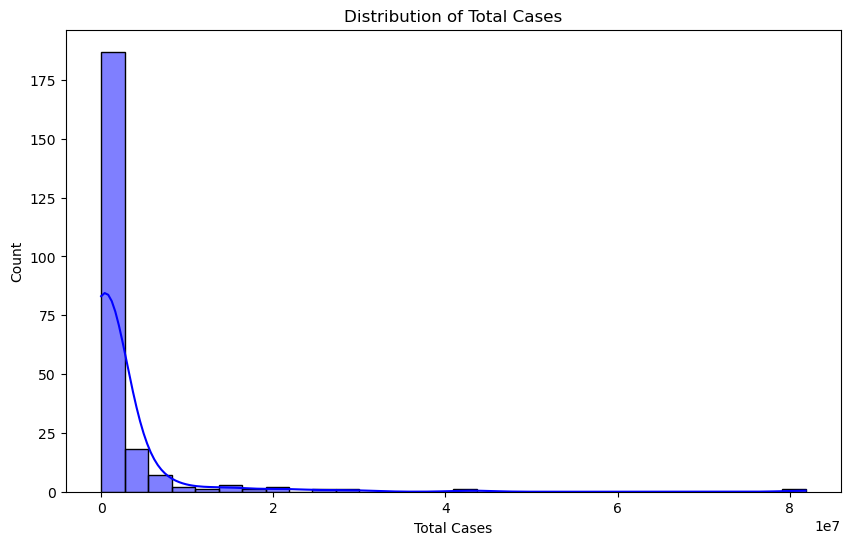

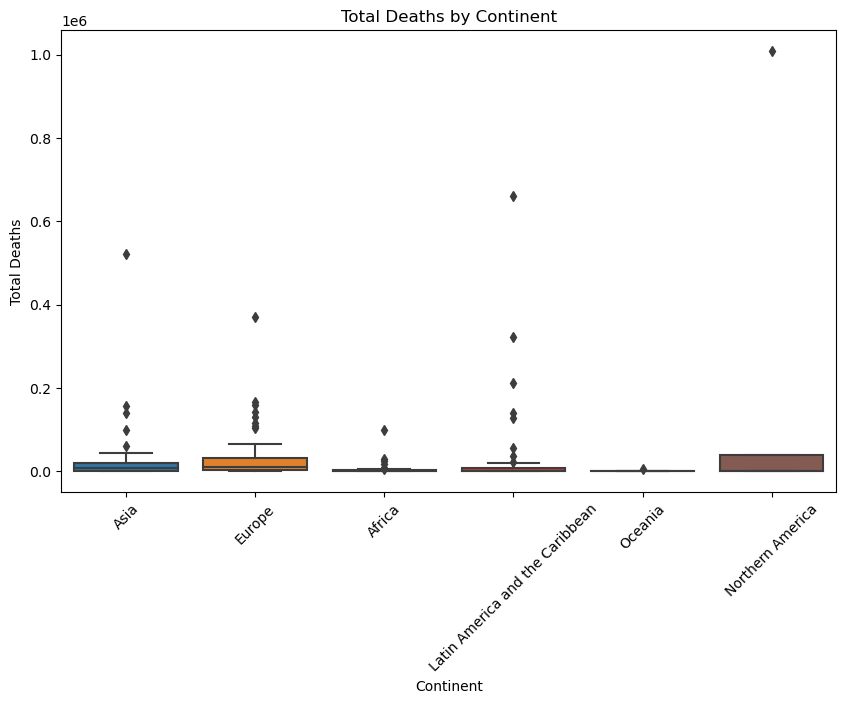

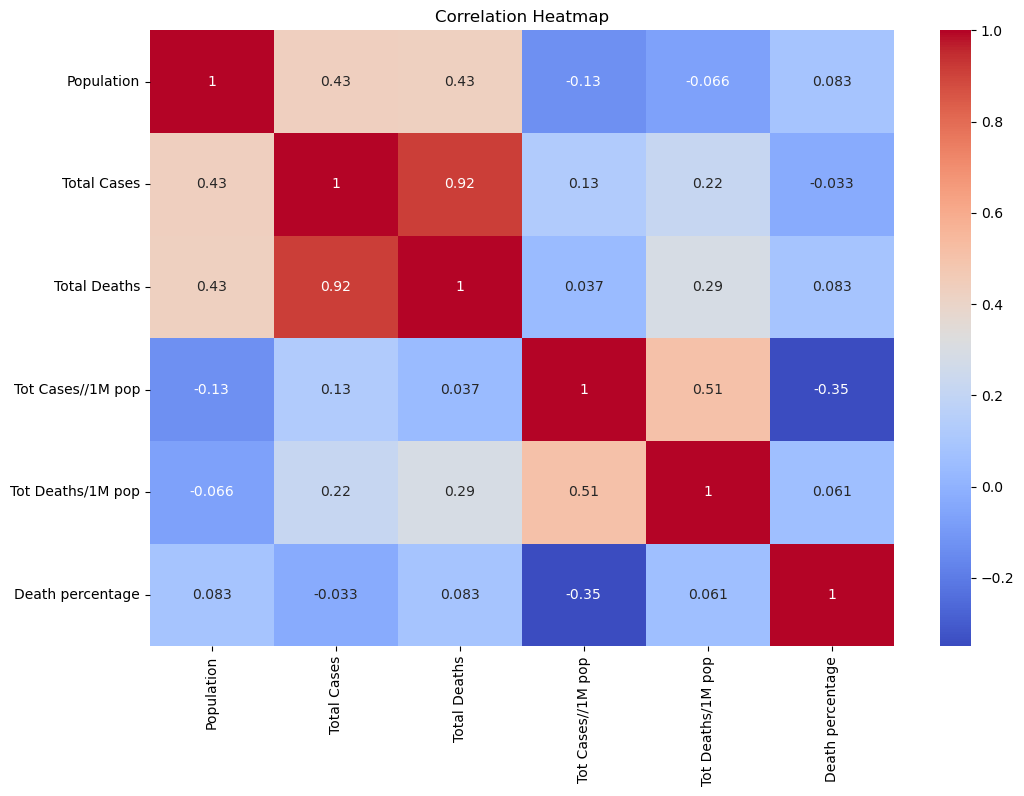

In [8]:

# Visualize distributions of key variables
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Cases'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Total Deaths', data=data)
plt.title('Total Deaths by Continent')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Clustering

C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


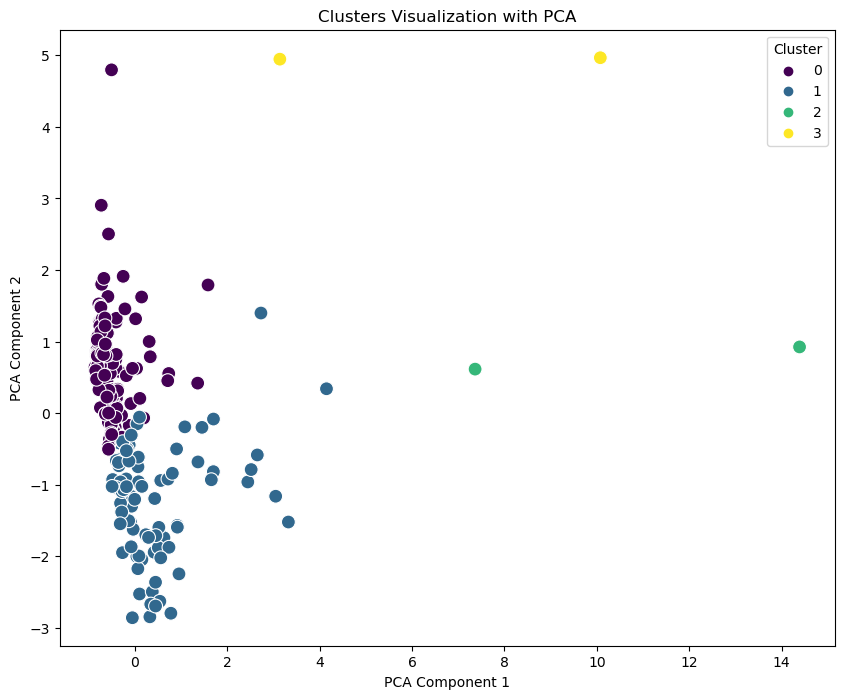

Cleaned dataset saved to cleaned_covid19_data.csv


In [18]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save cleaned and processed data
output_file = 'cleaned_covid19_data.csv'
data.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to {output_file}")



# Kesimpulan

# Polarisasi antar cluster:
- *Cluster 0*: Negara dengan populasi kecil, kasus rendah, dan kematian rendah.
- *Cluster 1*: Negara dengan populasi besar tetapi rasio kasus rendah per juta penduduk.
- *Cluster 2*: Negara dengan tingkat kasus tinggi tetapi rasio kematian rendah.
- *Cluster 3*: Negara dengan tingkat kasus dan kematian tinggi.

### Rekomendasi:
- *Cluster 3* membutuhkan prioritas tinggi untuk intervensi karena kasus dan tingkat kematian yang tinggi.
- *Cluster 2* dapat dipelajari lebih lanjut untuk memahami mengapa kematian tetap rendah meskipun kasus tinggi.

### Aplikasi lebih lanjut:
Hasil clustering ini dapat digunakan oleh organisasi kesehatan untuk:
- Mengalokasikan sumber daya dengan lebih efektif.
- Menetapkan kebijakan spesifik untuk tiap kelompok negara.
- Melakukan penelitian lebih mendalam terkait pola penyebaran COVID-19.